## Business Problems
...

For updates

### Import Packages

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load  Data & Features Details

In [66]:
red = pd.read_csv("winequality-red.csv", sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


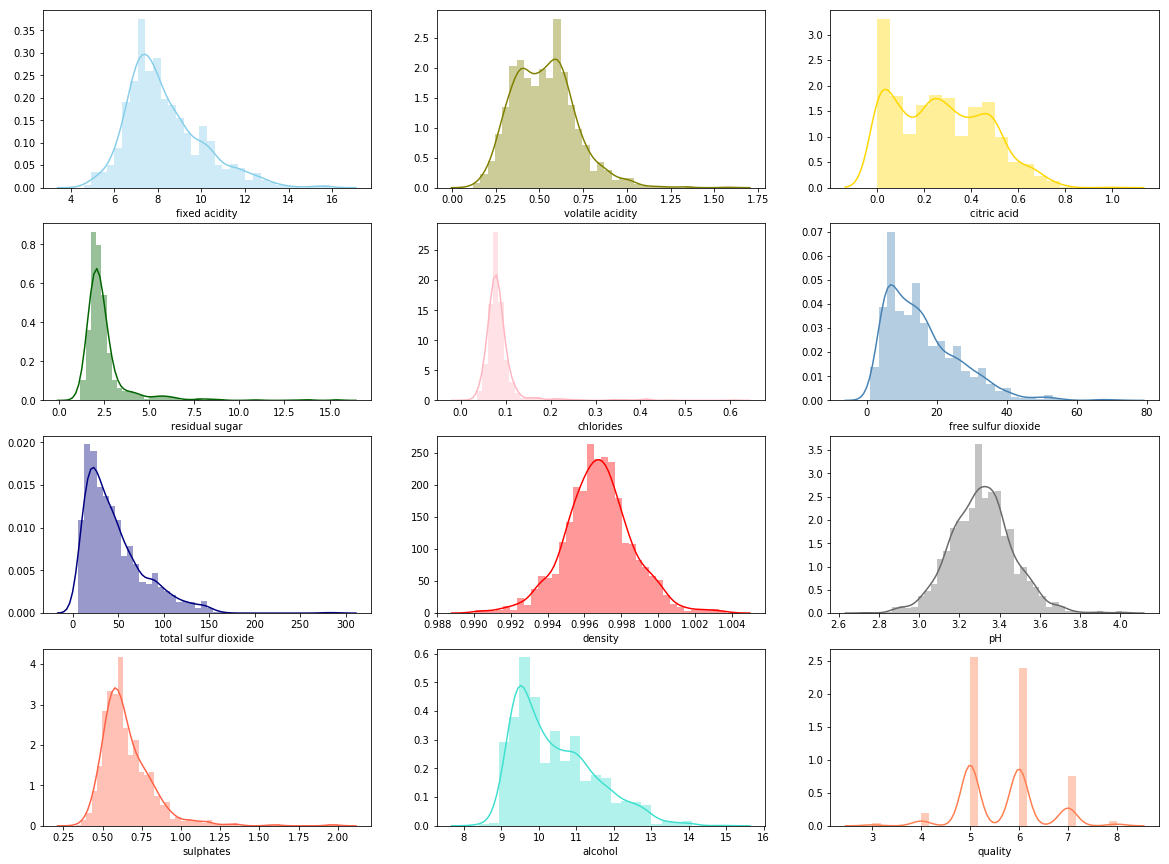

In [16]:
f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.distplot( red["fixed acidity"] , color="skyblue",  ax=axes[0, 0])
sns.distplot( red["volatile acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( red["citric acid"] , color="gold", ax=axes[0, 2])
sns.distplot( red["residual sugar"] , color="darkgreen", ax=axes[1, 0])
sns.distplot( red["chlorides"] , color="lightpink", ax=axes[1, 1])
sns.distplot( red["free sulfur dioxide"] , color="steelblue", ax=axes[1, 2])
sns.distplot( red["total sulfur dioxide"] , color="navy", ax=axes[2, 0])
sns.distplot( red["density"] , color="r", ax=axes[2, 1])
sns.distplot( red["pH"] , color="dimgrey", ax=axes[2, 2])
sns.distplot( red["sulphates"] , color="tomato", ax=axes[3, 0])
sns.distplot( red["alcohol"] , color="turquoise", ax=axes[3, 1])
sns.distplot( red["quality"] , color="coral", ax=axes[3, 2])

In [67]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

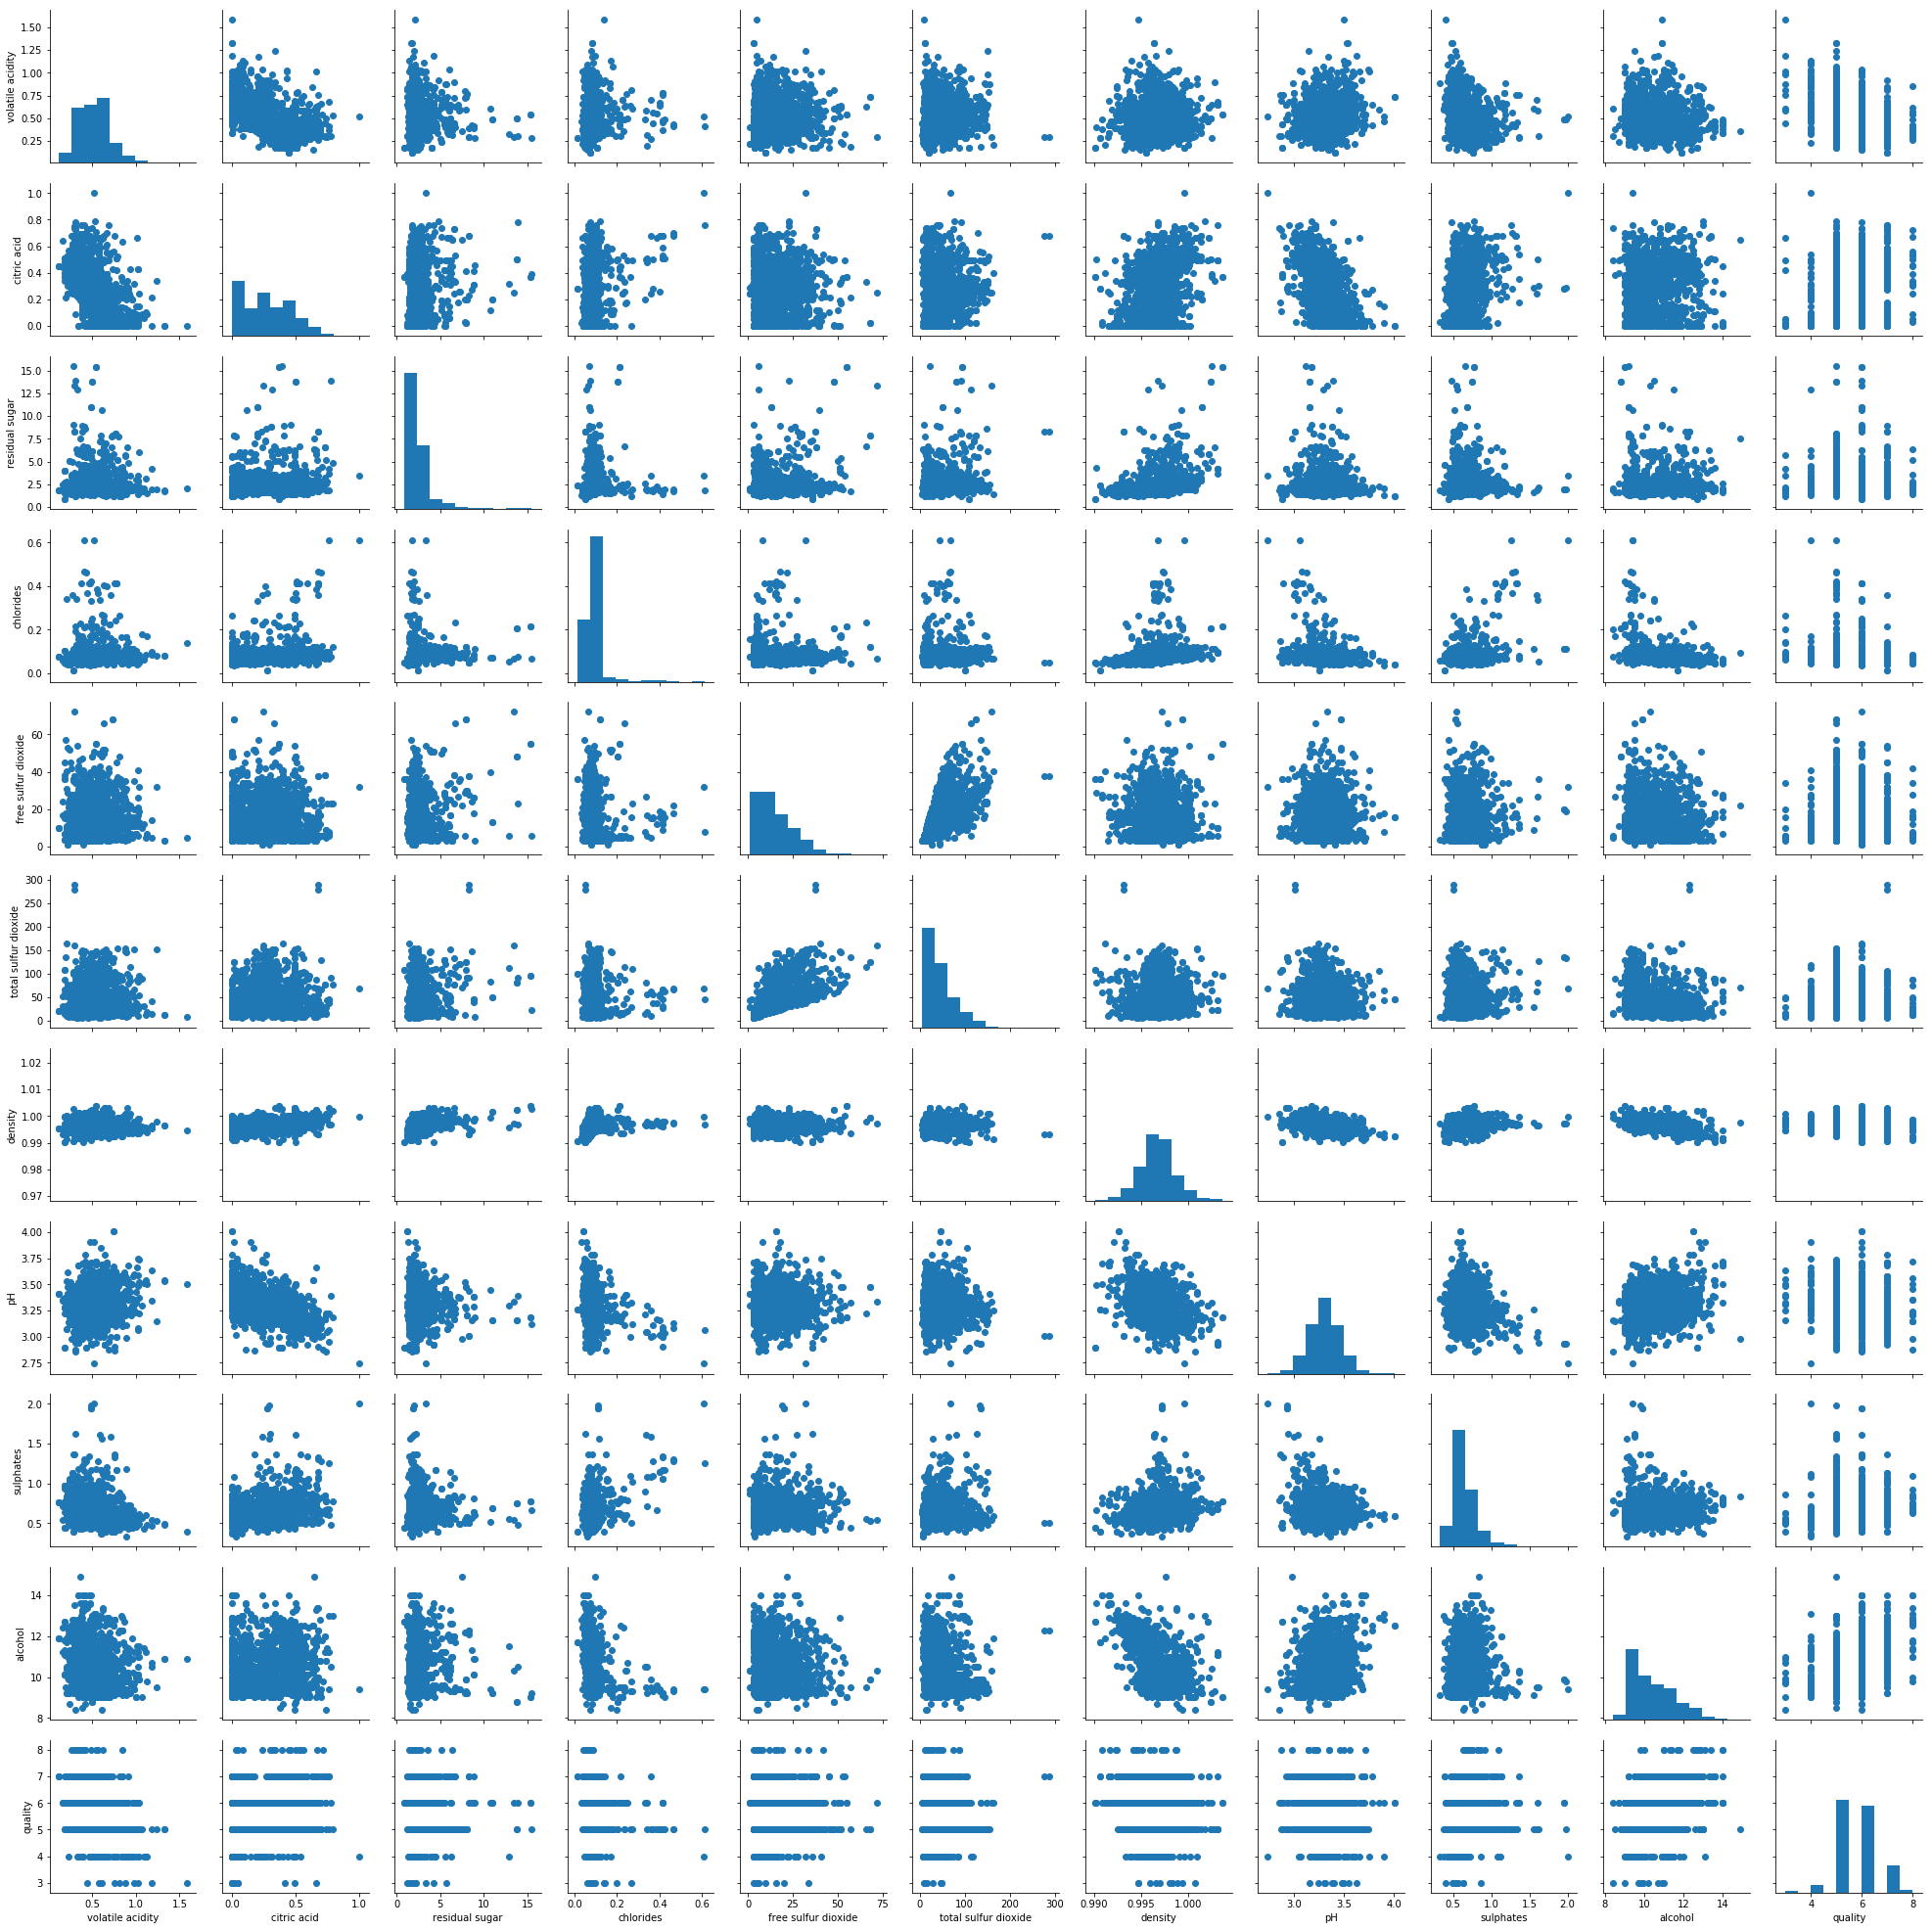

In [18]:
#PairGrid Plot
ax = sns.PairGrid(red, vars = red.iloc[:,1:13])
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
#ax = ax.add_legend()

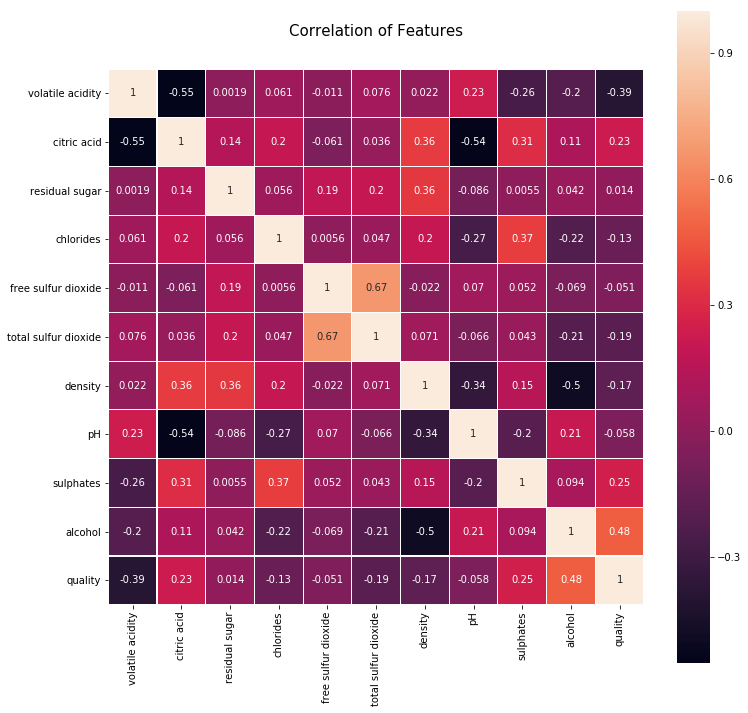

In [19]:
#Heat Map
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(red.iloc[:,1:13].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

[need to be updated]For both white and red wines, alcohol affects the quality of the wine the most. The correlation between alcohol and quality for white wine is 0.44 and red is 0.48. 

The 2nd, 3rd, and 4th important features that affect the alcohol quality the most for white and red wines are as the following: 

Red: volatile acidity (-0.39), sulphates (0.25), citric acid (0.23).

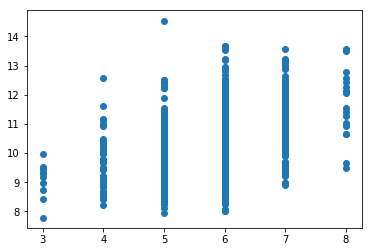

In [68]:
plt.scatter(red["quality"], -red['volatile acidity']+red['alcohol'])

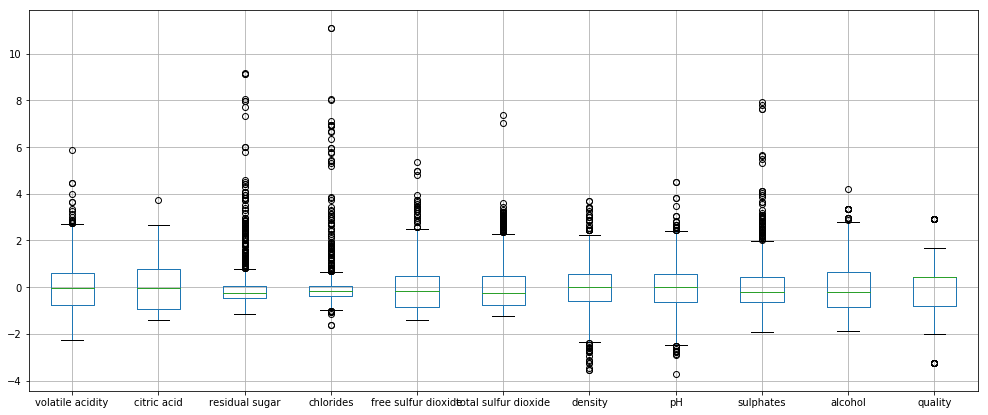

In [69]:
#BoxPlot
plt.figure(figsize=(17, 7))

((red.iloc[:,1:13] - red.iloc[:,1:13].mean()) / red.iloc[:,1:13].std()).boxplot()

## Statistical Method Outlier Detect - Interquartile Ranges & Outliers

In [177]:
# Dectecting outliers which are defined as outside of lower and upper whisker in the box plot
from collections import Counter


# outliers funtion: 
# df is the input data set
# variables are targeted features or column names
# n is number of features with potential outliers in each observation. eg. if n = 1, 
#             then the outliers are the rows with more than 1 features have outter trange values

def outliers(df, variables, n,a):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        
        # Define outliers are outside of 1.5 IQR
        outliers_temp = (df[(df[col] < lower - IQR * a)|(df[col] > upper + IQR * a)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return(multiple_outliers)   

col_list = list(red.columns.values)

# return index list of outliers
Outliers_to_drop = outliers(red, col_list, 2,1.5)
print(Outliers_to_drop)
print(col_list)

[353, 364, 366, 374, 440, 442, 538, 554, 555, 557, 559, 564, 652, 690, 1299, 151, 14, 15, 396, 400, 415, 515, 1114, 1244, 1358, 1434, 1435, 1474, 1476, 1558, 614, 695, 1319, 588, 821, 1269, 1270]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Machine Learning Outlier Detect - DBSCAN


In [164]:
import math
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Treat data set as an unlabeled data set and impliment the DBSCAN to detect outliers
y = red.iloc[:,-1].values
X = red.iloc[:, :-1].values

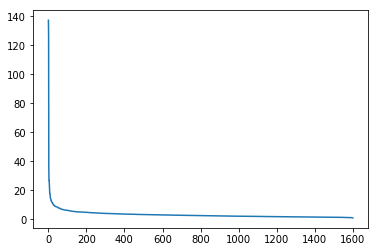

In [165]:

# determine the minimum number of reachable sample
min_sample = round(math.log(len(X)))

nbrs = NearestNeighbors(n_neighbors=min_sample).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,-1], reverse=True)
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)



[0, 150, 0, 30]

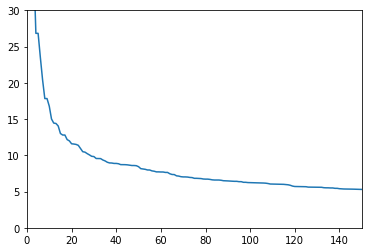

In [166]:
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)
plt.axis([0,150,0,30])

In [167]:
# DBSCAN method

# From the plot, the turnning point is around 10, so set the spslion is 10.
epslion = 10
dbsc = DBSCAN(eps = epslion, min_samples = min_sample).fit(X)
# Get the labels
labels = dbsc.labels_
# Identify the core points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True


In [168]:
# Check if there are two classses. The minor class suppouse to be outliers

unique_labels = np.unique(labels)
print(unique_labels)

# outlier s
outliers = np.where(labels == -1)
outliers = np.array(outliers).tolist()
outliers = outliers[0]

[-1  0]


Text(0, 0.5, 'Y')

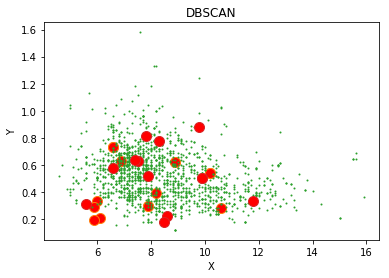

In [169]:
# Generate the plot

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = 'green', markersize = 1)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = 'red', markersize = 10)
        
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")

In [170]:
#Intercept of two outlier lists
outlier_list = set(Outliers_to_drop) & set(outliers)
outlier_list 

{14, 15, 396, 400, 1244, 1434, 1435, 1558}

In [171]:
redoutlier = red.copy()
redoutlier['outlier'] = 0
for i in outlier_list:
    redoutlier.iloc[i,12]=1

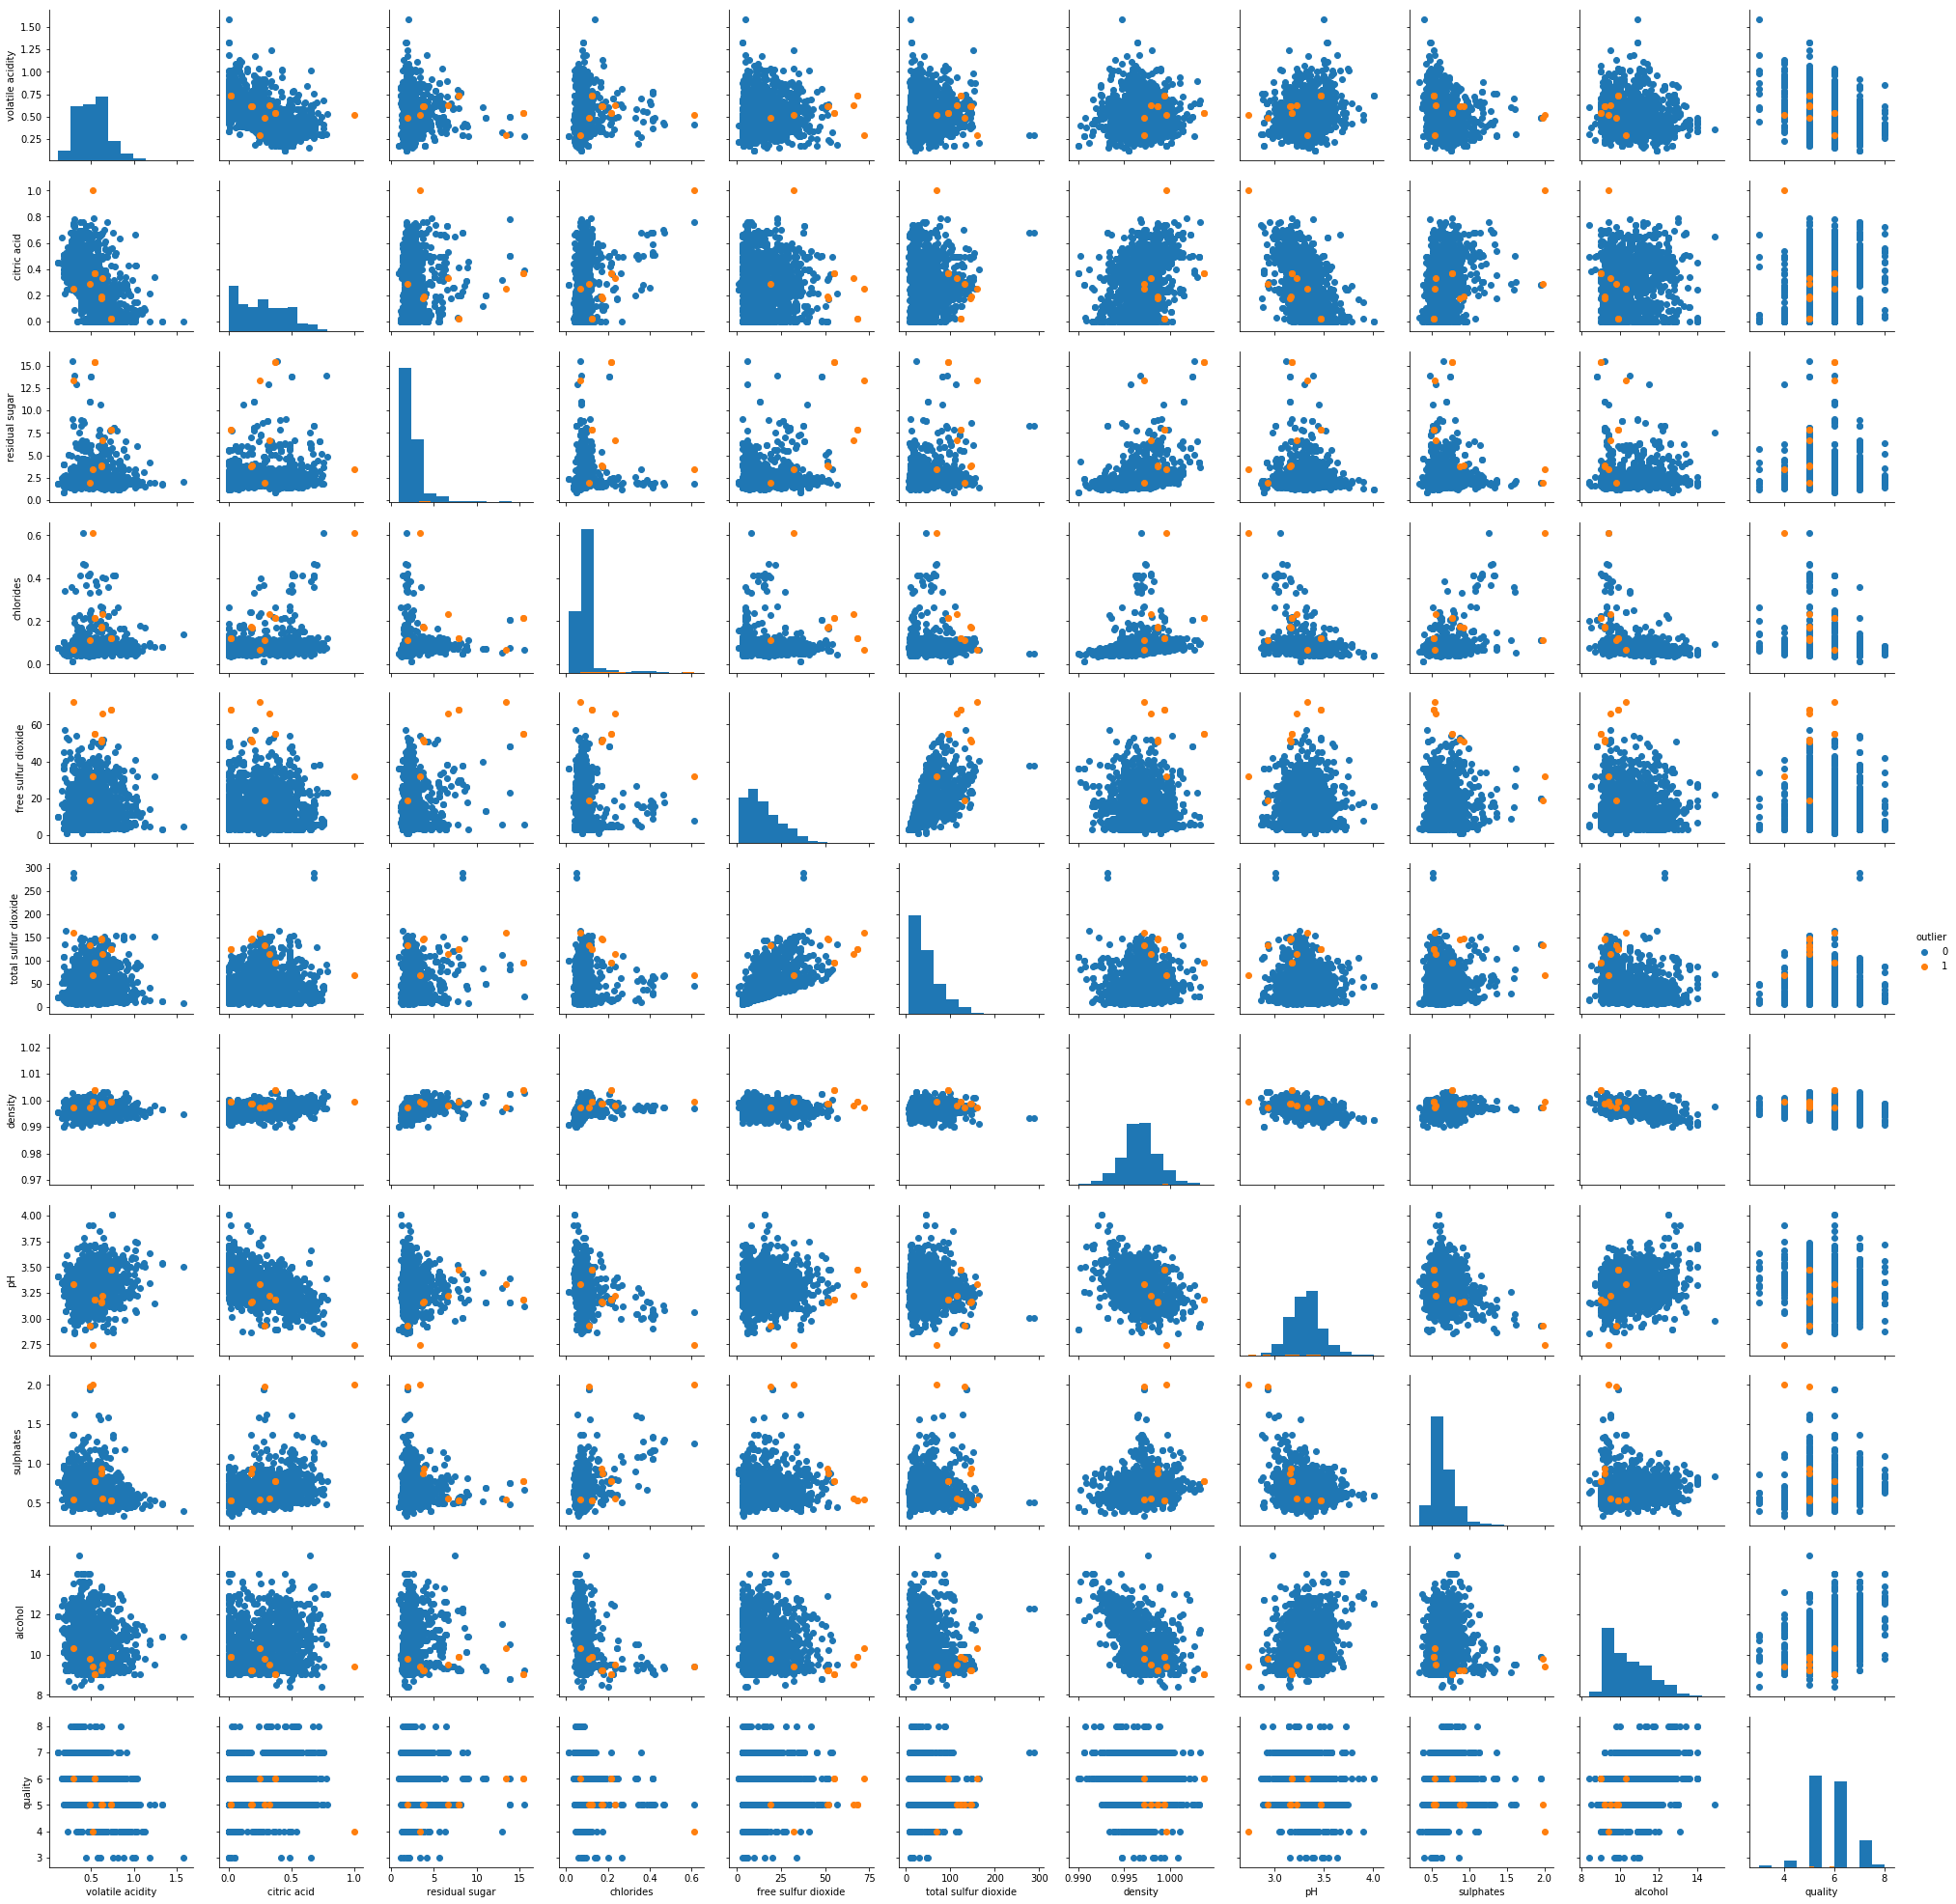

In [153]:
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

In [178]:
# return index list of outliers
col_list2 = ['total sulfur dioxide']
Outliers_to_drop = outliers(red, col_list2, 0,3)
print(Outliers_to_drop)

[1079, 1081]


In [179]:
outlier_list  = list(outlier_list)+Outliers_to_drop
print(outlier_list)

[396, 14, 15, 400, 1558, 1434, 1435, 1244, 1079, 1081]


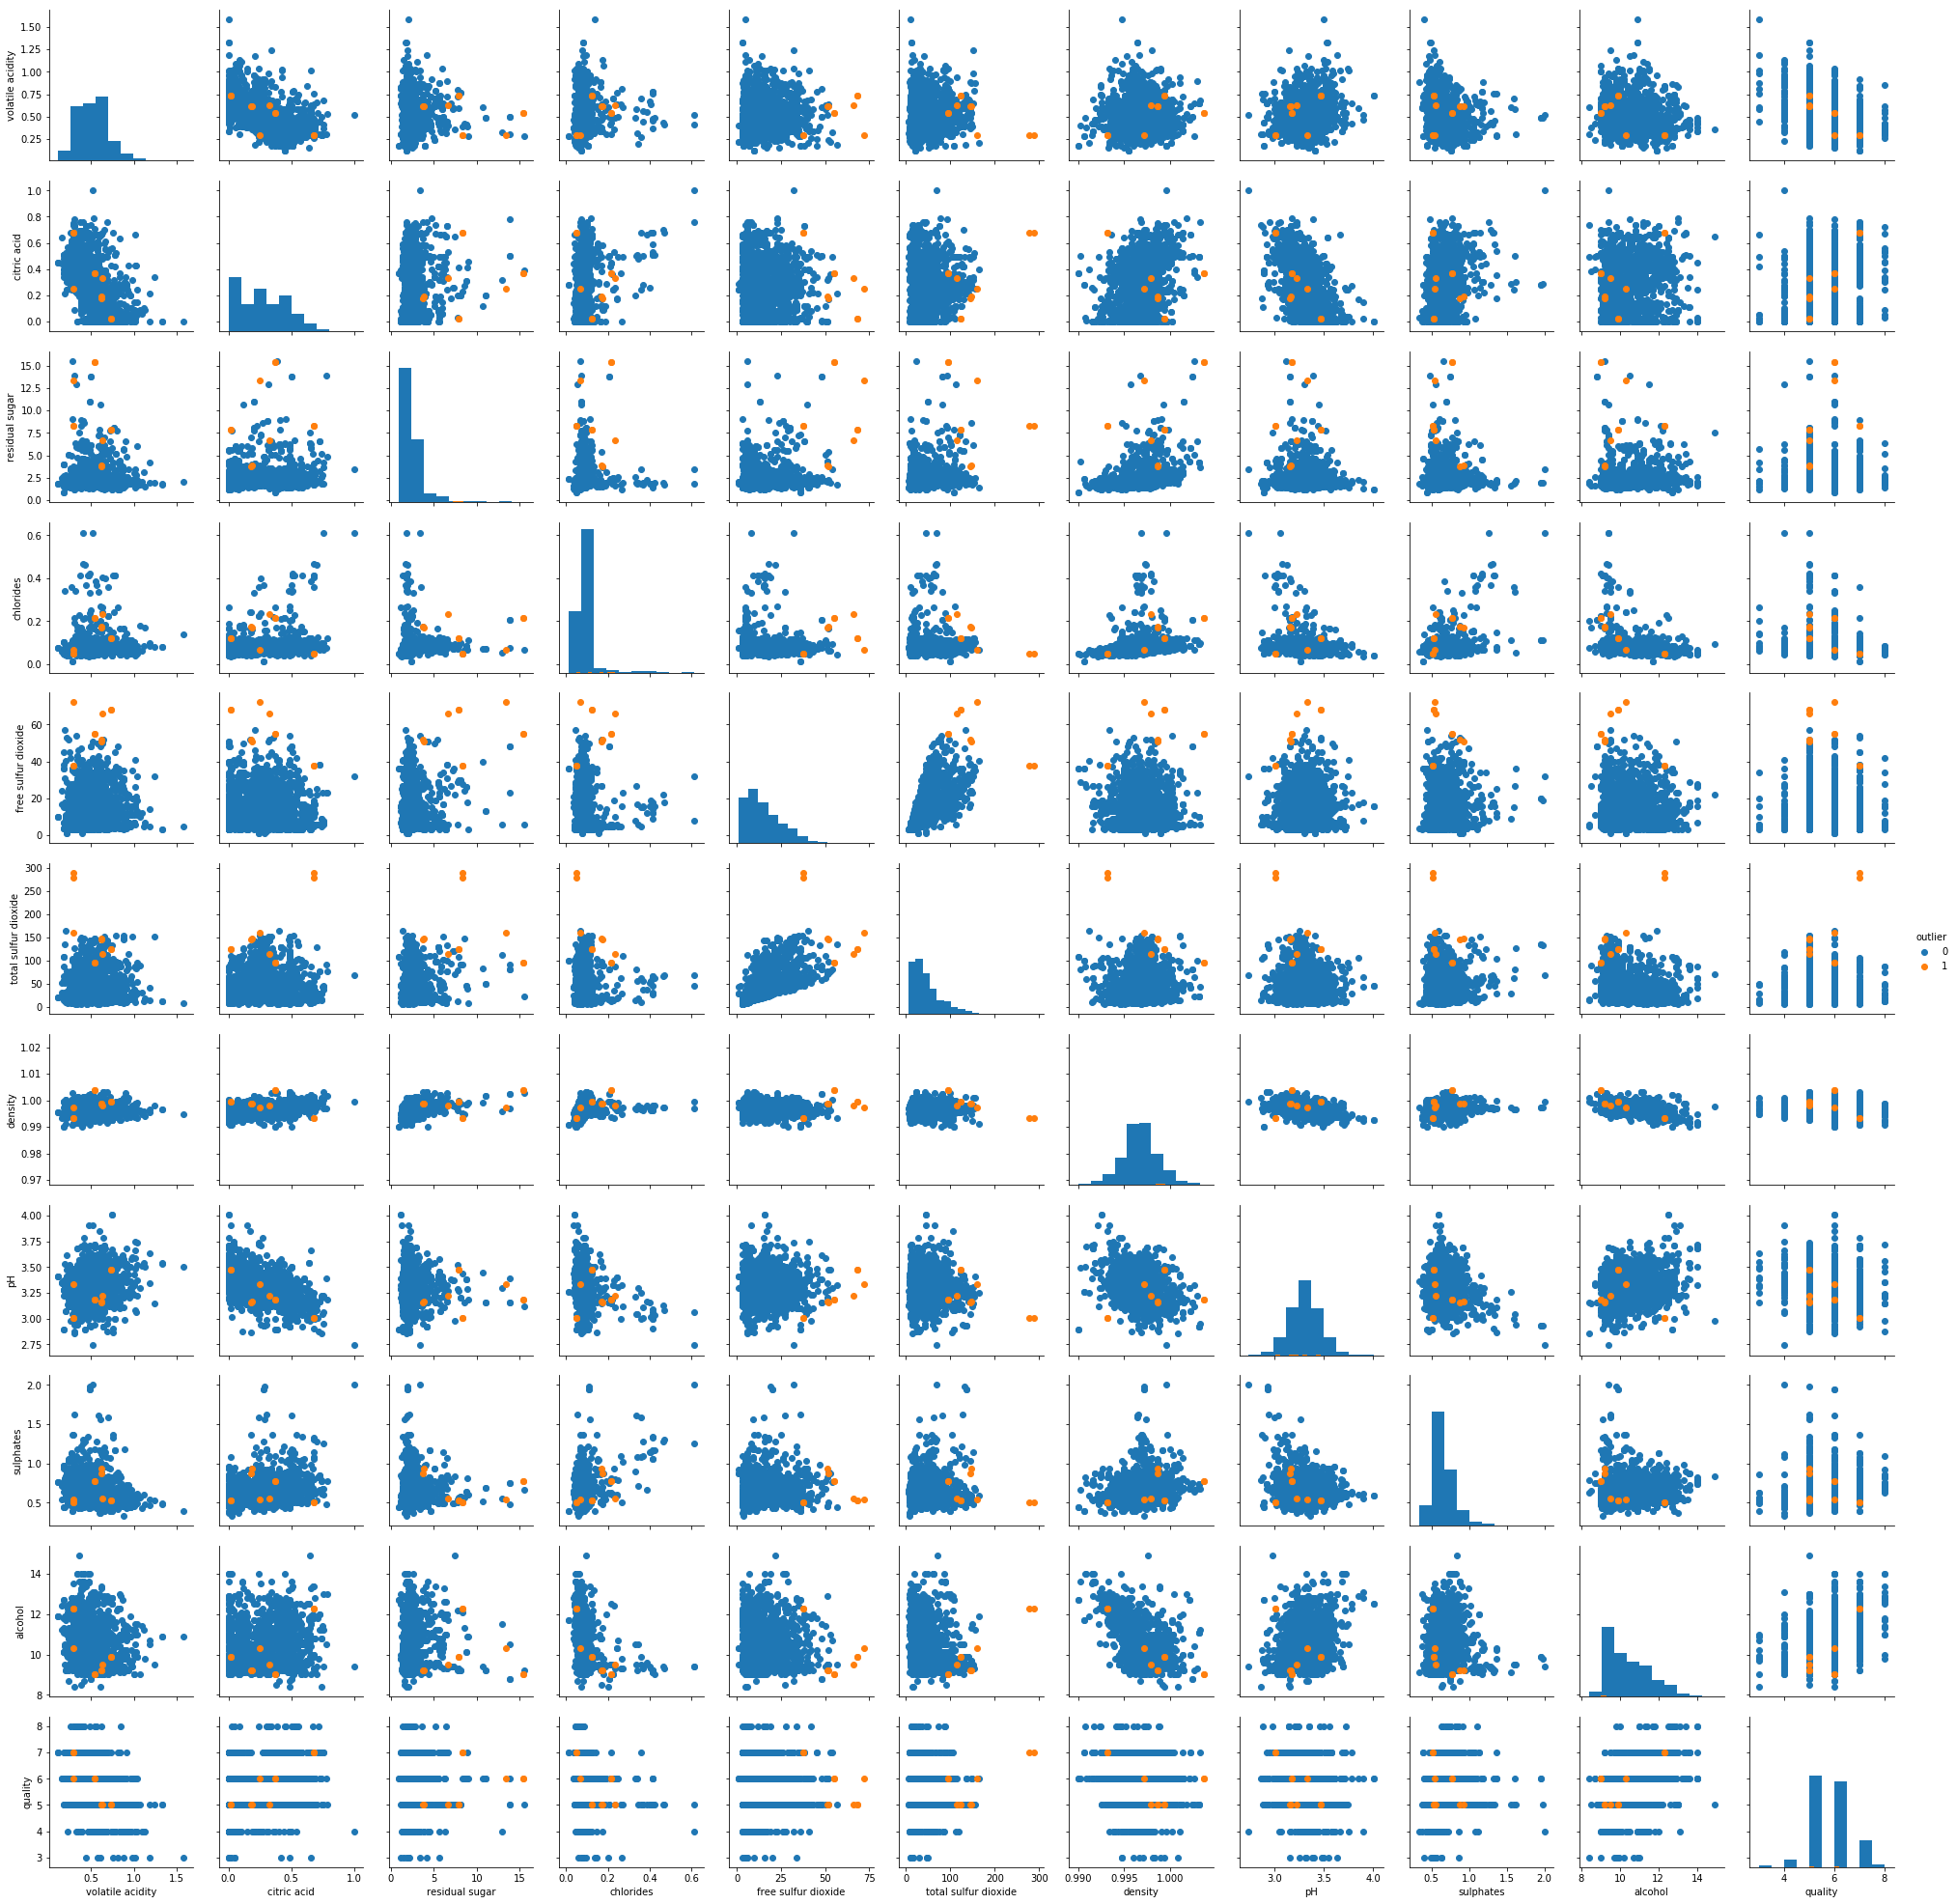

In [180]:
for i in outlier_list:
    redoutlier.iloc[i,12]=1
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

In [182]:
red = red.drop(outlier_list,axis=0)
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.321649,0.527801,0.270736,2.497514,0.087123,15.621145,45.770296,0.996736,3.311687,0.658181,10.425267,5.635620
std,1.742619,0.179142,0.194608,1.274764,0.046716,9.946660,31.359425,0.001869,0.154224,0.169579,1.064440,0.807718
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,57.000000,165.000000,1.003200,4.010000,2.000000,14.900000,8.000000


### Random Match Reviews

In [210]:
review_red = pd.read_csv('winemag-data_first150k.csv')
review_red = review_red.drop(['country','designation','points',\
                             'price','province','region_1','region_2',\
                             'variety','winery'], axis=1)
review_red.rename(columns={'Unnamed: 0':'Number'}, inplace= True)
red_reviews = pd.Series(review_red.description.values, index = review_red.Number).to_dict()
red = red.reset_index(drop=True)
red['review'] = np.random.randint(0,len(review_red),red.shape[0])
red['review'] = red['review'].map(red_reviews)
red.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,An interesting wine that makes you think. Stra...,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,This is such a wonderful value. It's rich in c...,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"Plump, sweet and plush peach flavors fill nose...",0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,This refined sparkling wine has a classic Fran...,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,A flamboyant Chardonnay. Shows flashy scents o...,0


### Review Word Cloud

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk import corpus
nltk.download("stopwords")
nltk.download('wordnet') 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [213]:
corpus = []
for i in range(0, len(red)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', red['review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

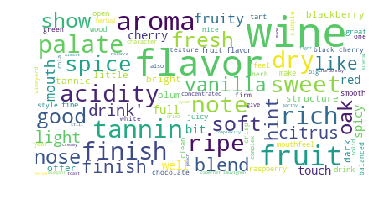

In [214]:
#! pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#### Get Word Features From the Review

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Feature Transformation

tfidf_vectorizer = TfidfVectorizer(max_features= 10, stop_words = 'english',strip_accents = 'unicode')
tfidf = tfidf_vectorizer.fit(red['review'])
# get the top 20 features of the overall review 
features = tfidf.get_feature_names()
print(features)

['acidity', 'aromas', 'cherry', 'finish', 'flavors', 'fruit', 'palate', 'ripe', 'tannins', 'wine']


In [216]:
#Get features for the wines with quality score 3 
review3 = red[(red['quality']==3)]['review']
tfidf3 = tfidf_vectorizer.fit(review3)
features3 = tfidf3.get_feature_names()
print(features3)

['aromas', 'cherry', 'drink', 'finish', 'flavors', 'palate', 'raspberry', 'spicy', 'sweet', 'wine']


In [217]:
#Get features for the wines with quality score 8
review8 = red[(red['quality']==8)]['review']
tfidf8 = tfidf_vectorizer.fit(review8)
features8 = tfidf8.get_feature_names()
print(features8)

['berry', 'dry', 'finish', 'flavors', 'fruit', 'great', 'like', 'pinot', 'wine', 'years']


In [218]:
#Difference of two group features
unique = set(features8).symmetric_difference( set(features3) )
print(unique)

{'raspberry', 'years', 'aromas', 'spicy', 'cherry', 'palate', 'sweet', 'pinot', 'berry', 'like', 'dry', 'drink', 'great', 'fruit'}


In [220]:
#Generate new features form review
red['aromas'] = red['review'].str.contains('aromas').astype(int)
red['spicy'] = red['review'].str.contains('spicy').astype(int)
red['sweet'] = red['review'].str.contains('sweet').astype(int)
red['dry'] = red['review'].str.contains('dry').astype(int)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,An interesting wine that makes you think. Stra...,0,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,This is such a wonderful value. It's rich in c...,0,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"Plump, sweet and plush peach flavors fill nose...",0,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,This refined sparkling wine has a classic Fran...,0,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,A flamboyant Chardonnay. Shows flashy scents o...,0,0,0,0


### Truncated SVD

In [222]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(max_features= 20, stop_words = 'english',strip_accents = 'unicode')
tfidf_trans = tfidf_vectorizer.fit_transform(red['review'])

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=10)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit
pipeline.fit(tfidf_trans)

# Calculate the cluster labels: labels
labels = pipeline.predict(tfidf_trans)

df = pd.DataFrame({'label': labels, 'quality': red['quality'],'review':red['review']})
print(df.sort_values('label'))

red['label'] = labels
red.head()

      label  quality                                             review
881       0        5  Bold and expressive, this bursts with cherry, ...
1402      0        6  Here's a soft, easy Syrah, with a peppermint e...
1098      0        6  Granite and red cherry notes are reminiscent o...
1097      0        6  An easy wine, generous in cherry, cola, spice ...
1096      0        6  One of the best Edna Valley Pinot Noirs ever. ...
...     ...      ...                                                ...
271       5        5  The delicate aromas that characterize this rip...
707       5        5  The style at Pauly-Bergweiler leans toward ult...
273       5        6  Slightly murky, with vague aromas hinting at g...
449       5        7  This is mainly Semillon and Sauvignon Blanc, w...
1179      5        6  Sourced largely from the northern end of the r...

[1589 rows x 3 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,An interesting wine that makes you think. Stra...,0,0,0,1,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,This is such a wonderful value. It's rich in c...,0,0,0,1,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"Plump, sweet and plush peach flavors fill nose...",0,0,1,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,This refined sparkling wine has a classic Fran...,0,0,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,A flamboyant Chardonnay. Shows flashy scents o...,0,0,0,0,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


## Kmeans Clustering

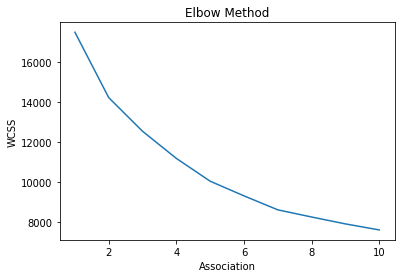

In [231]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_standardized=scaler.fit_transform(red.iloc[:,0:11])
y=red['quality']

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [232]:
# elbow point is about 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7  8
labels                         
0        2   4   83  122  49  5
1        1   6  221  101  10  0
2        0   1   17    9   1  0
3        0  10   35  104  25  4
4        0   1   30   10   5  0
5        7  29  264  164  20  0
6        0   2   26  125  87  9


In [233]:
# using 6 clusters instead (same as the number of quality classes showing in the dataset)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7  8
labels                         
0        0  10   39  108  25  4
1        0   1   19    9   1  0
2        1   7  239  101   9  0
3        2   4   83  126  53  5
4        0   2   26  124  89  9
5        7  29  270  167  20  0


In [235]:
red['clusters']=labels
red_grouped = red.groupby('clusters').mean()
print(red_grouped)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
clusters                                                                 
0              6.358065          0.607634     0.085914        2.196237   
1              8.433333          0.529667     0.486000        1.963333   
2              8.111204          0.546989     0.277759        2.900000   
3             11.163370          0.419469     0.509377        2.938462   
4              8.408400          0.342420     0.409200        2.278000   
5              7.590467          0.637667     0.119919        2.219371   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clusters                                                                   
0          0.067452            19.569892             42.709677  0.994213   
1          0.347333            14.966667             62.933333  0.997087   
2          0.085846            26.222689             87.369748  0.997310   
3          0.088560        

the predicted labels does not represent the quality well, but can be used for recommendation. 
for example, cluster 5 hasthe highest fixed acidity, cluster 1 has the lowest citric acid. 

In [236]:
red[red['clusters']==5].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry,label,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,An interesting wine that makes you think. Stra...,0,0,0,1,3,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"Plump, sweet and plush peach flavors fill nose...",0,0,1,0,2,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,A flamboyant Chardonnay. Shows flashy scents o...,0,0,0,0,1,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,"Gold in color, with mineral, toast, baked appl...",1,0,0,0,4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,A delightful wine that fulfills the blush requ...,0,0,0,1,5,5


In [237]:
red=red.drop(columns=['clusters'])

# TSNE

In [276]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)

X_embedded = TSNE(n_components=3, perplexity=40, verbose=2).fit_transform(X_transformed)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1589 samples in 0.002s...
[t-SNE] Computed neighbors for 1589 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1589
[t-SNE] Computed conditional probabilities for sample 1589 / 1589
[t-SNE] Mean sigma: 0.811831
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 72.2300186, gradient norm = 0.0099892 (50 iterations in 3.921s)
[t-SNE] Iteration 100: error = 69.4909439, gradient norm = 0.0020412 (50 iterations in 4.320s)
[t-SNE] Iteration 150: error = 69.3139801, gradient norm = 0.0089742 (50 iterations in 3.072s)
[t-SNE] Iteration 200: error = 69.1237335, gradient norm = 0.0004235 (50 iterations in 2.592s)
[t-SNE] Iteration 250: error = 69.1187973, gradient norm = 0.0003723 (50 iterations in 2.820s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.118797
[t-SNE] Iteration 300: error = 0.9955970, gradient norm = 0.0006232 (50 iterations in 2.491s

In [273]:
# TO DO HERE

### PCA

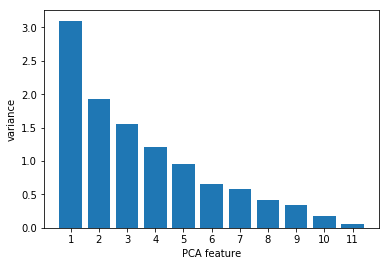

In [238]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create scaler: scaler - standard works better here.
scaler = StandardScaler()
#scaler = Normalizer()

# Create PCA instance: model
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(1,pca.n_components_+1)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

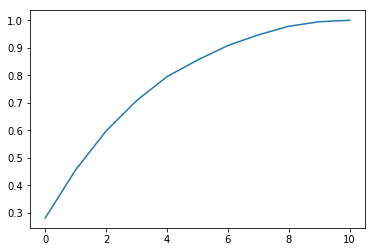

In [239]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [240]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9))

(array([ 6,  7,  8,  9, 10]),)


7 features explains more than 90%, 9 expalins more than 95%. 

In [242]:
npc = 7
pca = PCA(n_components=npc, copy=True)
X_transformed = pca.fit_transform(X_standardized)

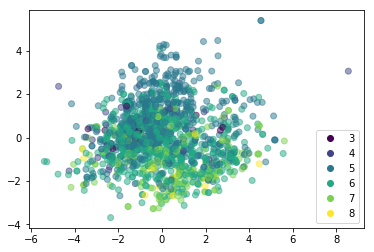

In [275]:
pca_df=pd.DataFrame(X_transformed)

labels = np.unique(y)
scatter = plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=y, label=y,alpha=0.5)

handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

## original data on 6 quality classes

In [ ]:
# import the class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#! pip install xgboost
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score

In [245]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['quality'],test_size=0.2,random_state=0,stratify=y)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]


for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

    100% |████████████████████████████████| 686kB 5.5MB/s ta 0:00:011
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.639,0.675,0.608,0.027,0.620,0.660,0.590,0.028
12,XG Boosting,0.632,0.664,0.614,0.018,0.616,0.644,0.596,0.016
10,Bagging Classifier,0.630,0.663,0.591,0.026,0.612,0.647,0.575,0.028
3,SVC(RBF),0.609,0.643,0.588,0.021,0.583,0.621,0.563,0.024
4,SVC(polynomial),0.593,0.629,0.570,0.023,0.569,0.603,0.544,0.024
0,Logistic Regression,0.588,0.635,0.554,0.029,0.552,0.603,0.514,0.030
11,Ada Boosting,0.583,0.606,0.560,0.018,0.582,0.607,0.555,0.022
2,Linear SVC,0.581,0.631,0.558,0.027,0.536,0.590,0.512,0.028
5,Decision Tree,0.576,0.605,0.541,0.021,0.574,0.601,0.536,0.022
1,SVC(linear kernal),0.575,0.635,0.534,0.033,0.525,0.578,0.482,0.031


## break it into 3 tiers

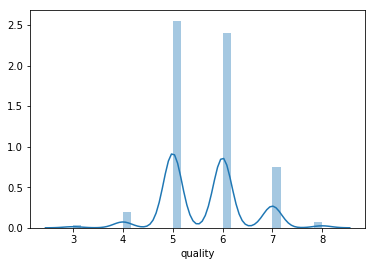

In [246]:
sns.distplot(red['quality'])

the majority of the wines are in quality class 5 and 6. we consider 6 as the middle class by itself, and the ones below 6 to be the lower class, and the ones above to be the upper class. 

In [247]:
# 3 levels
tiers = []
for i in red['quality']:
    if i >= 1 and i <= 5:
        tiers.append('1')
    elif i ==6:
        tiers.append('2')
    elif i >= 7 and i <= 10:
        tiers.append('3')
red['tier'] = tiers

In [248]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['tier'],test_size=0.2,random_state=0,stratify=y)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]


for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.681,0.710,0.652,0.020,0.677,0.704,0.650,0.019
12,XG Boosting,0.674,0.715,0.645,0.027,0.669,0.713,0.641,0.029
10,Bagging Classifier,0.666,0.684,0.646,0.016,0.661,0.680,0.641,0.016
11,Ada Boosting,0.644,0.668,0.621,0.017,0.644,0.669,0.621,0.017
3,SVC(RBF),0.640,0.668,0.617,0.021,0.630,0.663,0.604,0.024
5,Decision Tree,0.631,0.643,0.617,0.010,0.632,0.643,0.617,0.010
4,SVC(polynomial),0.622,0.659,0.597,0.021,0.607,0.647,0.577,0.024
0,Logistic Regression,0.617,0.676,0.581,0.032,0.601,0.659,0.560,0.033
1,SVC(linear kernal),0.616,0.672,0.569,0.034,0.604,0.651,0.557,0.031
2,Linear SVC,0.607,0.648,0.569,0.031,0.581,0.622,0.540,0.034


## 2 classes models - good vs bad

In [249]:
# break qualities into 2 levels
red['good?']=(red['quality']>=6)*1

In [250]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['good?'],test_size=0.2,random_state=0,stratify=y)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]


for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
10,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
6,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
12,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022
3,SVC(RBF),0.745,0.780,0.713,0.022,0.745,0.779,0.713,0.022
2,Linear SVC,0.743,0.807,0.701,0.035,0.743,0.807,0.701,0.035
0,Logistic Regression,0.741,0.811,0.697,0.038,0.741,0.811,0.697,0.038
1,SVC(linear kernal),0.740,0.815,0.685,0.042,0.741,0.815,0.685,0.042
4,SVC(polynomial),0.733,0.768,0.705,0.021,0.733,0.767,0.705,0.021
7,Naive Bayes,0.727,0.772,0.693,0.025,0.726,0.769,0.693,0.025
5,Decision Tree,0.721,0.740,0.698,0.016,0.720,0.738,0.698,0.015


fit a votingclassifier model with the top 4 models

In [252]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Bagging Classifier', bc),
('XG Boosting', xg),
('Random Forest',rf)]
vc = VotingClassifier(estimators=classifiers)

acc_scores = cross_val_score(vc, X_train, y_train, scoring='accuracy',cv=5)
f1_scores = cross_val_score(vc, X_train, y_train, scoring='f1_weighted',cv=5)
acc_mean.append(acc_scores.mean())
acc_high.append(acc_scores.max())
acc_low.append(acc_scores.min())
acc_std.append(acc_scores.std())
f1_mean.append(f1_scores.mean())
f1_high.append(f1_scores.max())
f1_low.append(f1_scores.min())
f1_std.append(f1_scores.std())

names.append('voting classifier')
cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
14,voting classifier,0.792,0.827,0.760,0.027,0.792,0.827,0.760,0.027
10,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
13,voting classifier,0.777,0.811,0.748,0.027,0.777,0.811,0.748,0.027
6,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
12,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022
3,SVC(RBF),0.745,0.780,0.713,0.022,0.745,0.779,0.713,0.022
2,Linear SVC,0.743,0.807,0.701,0.035,0.743,0.807,0.701,0.035
0,Logistic Regression,0.741,0.811,0.697,0.038,0.741,0.811,0.697,0.038
1,SVC(linear kernal),0.740,0.815,0.685,0.042,0.741,0.815,0.685,0.042
4,SVC(polynomial),0.733,0.768,0.705,0.021,0.733,0.767,0.705,0.021


## using pca transformed data

In [253]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['good?'],test_size=0.2,random_state=0,stratify=y)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]

for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.758,0.787,0.736,0.020,0.758,0.788,0.736,0.020
10,Bagging Classifier,0.751,0.780,0.720,0.023,0.752,0.780,0.721,0.023
3,SVC(RBF),0.742,0.795,0.705,0.033,0.742,0.795,0.705,0.033
12,XG Boosting,0.735,0.764,0.709,0.023,0.735,0.764,0.709,0.023
5,Decision Tree,0.729,0.780,0.681,0.032,0.729,0.780,0.682,0.032
0,Logistic Regression,0.728,0.811,0.689,0.044,0.728,0.811,0.689,0.044
2,Linear SVC,0.728,0.803,0.685,0.044,0.730,0.807,0.685,0.044
4,SVC(polynomial),0.726,0.776,0.697,0.030,0.725,0.774,0.696,0.030
11,Ada Boosting,0.726,0.787,0.673,0.039,0.726,0.787,0.673,0.038
1,SVC(linear kernal),0.725,0.799,0.693,0.039,0.725,0.799,0.693,0.039


## using the 2 most dominated features

In [254]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(red[['volatile acidity','alcohol']],red['good?'],
                                               test_size=0.2,random_state=0,stratify=y)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]


for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
2,Linear SVC,0.731,0.795,0.709,0.032,0.730,0.799,0.697,0.036
12,XG Boosting,0.727,0.811,0.693,0.043,0.727,0.811,0.693,0.043
6,Random Forest,0.723,0.764,0.697,0.024,0.723,0.763,0.697,0.024
7,Naive Bayes,0.722,0.807,0.690,0.043,0.722,0.807,0.690,0.044
3,SVC(RBF),0.720,0.783,0.689,0.033,0.720,0.784,0.689,0.033
0,Logistic Regression,0.718,0.787,0.669,0.038,0.717,0.787,0.669,0.038
4,SVC(polynomial),0.712,0.795,0.677,0.043,0.711,0.795,0.676,0.043
1,SVC(linear kernal),0.711,0.787,0.681,0.039,0.711,0.788,0.681,0.039
10,Bagging Classifier,0.709,0.768,0.646,0.041,0.709,0.767,0.645,0.041
11,Ada Boosting,0.707,0.764,0.671,0.037,0.706,0.763,0.671,0.037


### GridSearch

In [271]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
             'min_samples_split':list(range(2,10)),
             'min_samples_leaf':list(range(1,5))}
searcher = GridSearchCV(dt, parameters,cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best CV accuracy 0.7167584579071598


In [272]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'n_estimators':list(range(10,100,10)),
              'min_samples_split':list(range(2,10)),
              'min_samples_leaf':list(range(1,5)),
              'max_depth': list(range(2,11,2))}
searcher = GridSearchCV(rf, parameters,cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Best CV accuracy 0.7482297403619197


### SMOTE

In [311]:
# Define a function to create a scatter plot of our data and labels
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

y = red.iloc[:,11].values
X = red.iloc[:, 0:11].values

def plot_data(X, y):
	plt.scatter(X[y == 3, 0], X[y == 3, 1], label="Class #3", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 4, 0], X[y == 4, 1], label="Class #4", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 5, 0], X[y == 5, 1], label="Class #5", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 6, 0], X[y == 6, 1], label="Class #6", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 7, 0], X[y == 7, 1], label="Class #7", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 8, 0], X[y == 8, 1], label="Class #8", alpha=0.5, linewidth=0.15)
	plt.legend()
	return plt.show()



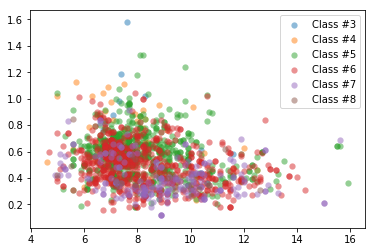

In [312]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [315]:
#! pip install imblearn
from imblearn.over_sampling import SMOTE

#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html


# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

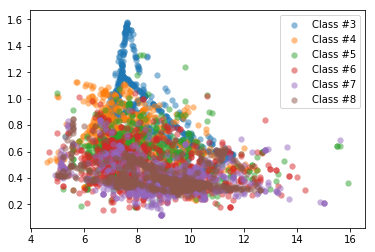

In [316]:
# Plot our data by running our plot data function on X and y
plot_data(X_resampled, y_resampled)

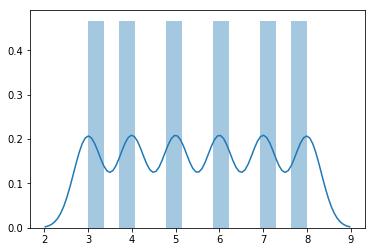

In [329]:
sns.distplot(y_resampled)

In [332]:
len(y_resampled)

4056

In [ ]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,
                                               test_size=0.2,random_state=0,stratify=y_resampled)

# logistic regression 
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
# xg 
xg=XGBClassifier()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]


for model in models:
   # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
    acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
    acc_mean.append(acc_scores.mean())
    acc_high.append(acc_scores.max())
    acc_low.append(acc_scores.min())
    acc_std.append(acc_scores.std())
    f1_mean.append(f1_scores.mean())
    f1_high.append(f1_scores.max())
    f1_low.append(f1_scores.min())
    f1_std.append(f1_scores.std())

cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

## content based recommendation

In [255]:
import pandas as pd
#from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [262]:
df = red[['review']]
df['ID'] = range(0,len(df['review']))
df.head()

,review,ID
0,An interesting wine that makes you think. Stra...,0
1,This is such a wonderful value. It's rich in c...,1
2,"Plump, sweet and plush peach flavors fill nose...",2
3,This refined sparkling wine has a classic Fran...,3
4,A flamboyant Chardonnay. Shows flashy scents o...,4


In [263]:
# putting the review in a list of words
df['review'] = df['review'].map(lambda x: x.lower().replace(',',' ').replace('.',' ').replace('!', ' '))
df.head()

,review,ID
0,an interesting wine that makes you think stra...,0
1,this is such a wonderful value it's rich in c...,1
2,plump sweet and plush peach flavors fill nose...,2
3,this refined sparkling wine has a classic fran...,3
4,a flamboyant chardonnay shows flashy scents o...,4


In [264]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['review'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [265]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim[0:5]

array([[1.        , 0.25522131, 0.28723811, ..., 0.25928149, 0.20004001,
        0.26255252],
       [0.25522131, 1.        , 0.40058289, ..., 0.44194887, 0.27897624,
        0.34174589],
       [0.28723811, 0.40058289, 1.        , ..., 0.36927447, 0.47212239,
        0.42735216],
       [0.26274693, 0.33824071, 0.47701498, ..., 0.35634832, 0.35053409,
        0.39692831],
       [0.29149154, 0.22931601, 0.29197275, ..., 0.24708311, 0.29738086,
        0.24019223]])

In [266]:
# function that takes in wineID as input and returns the top 10 recommended wines
def recommendations(wineID, cosine_sim = cosine_sim):
    
    recommended_wine = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == wineID].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_wine.append(list(df.index)[i])
        
    return recommended_wine

In [267]:
recommendations(2)

[1260, 421, 1013, 614, 767, 1471, 730, 1061, 167, 390]